In [58]:
# import libs that we will use
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import torch as th 
import torch.nn as nn 
import torch.nn.functional as F
import itertools
import matplotlib
import matplotlib.pyplot as plt 

# To load the data we will use the script of Gaetan Marceau Caron
# You can download it from the course webiste and move it to the same directory that contains this ipynb file
import dataset_loader

%matplotlib inline

In [2]:
# # Download mnist dataset 
# if("mnist.pkl.gz" not in os.listdir(".")):
#     !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

# if you have it somewhere else, you can comment the lines above
# and overwrite the path below
mnist_path = "../mnist.pkl.gz"

In [3]:
# load the 3 splits
train_data, dev_data, test_data = dataset_loader.load_mnist(mnist_path)

# Part one: MNIST classification with Pytorch
The goal of the first part is to learn how to use Pytorch and to observe the impact of regularization during training. You should test different network architectures, e.g. with hidden layers of size 128-128, 128-64-32-16, 256-128-64-32-16, 512-256-128-64-32-16, 800-800, and different activation functions (tanh, relu, sigmoid).

Remember that Pytorch expects data in a different format than in the previous lab exercise: the first dimension is always the batch dimension.

In [4]:
image = th.from_numpy(train_data[0][0])
print(image.shape) # flat image of dim (784,)

# reshape the tensor so it is represented as a batch containing a single image
# -1 means "all remaining elements", here it would be equivalent to image.reshape(1, 784)
image = image.reshape(1, -1)
print(image.shape) # flat image of dim (1, 784)

torch.Size([784])
torch.Size([1, 784])


In [5]:
# Constructing a batched input
batch_size = 10
first = 20

# the cat() function concatenates a list of tensor along a dimension
batch_input = th.cat(
    [
        # we reshape the image tensor so it has dimension (1, 784)
        th.from_numpy(image).reshape(1, -1)
        for image in train_data[0][first:first + batch_size]
    ],
    # we want to concatenate on the batch dimension
    dim=0
)
print(batch_input.shape)  # batch of ten flat images (10, 784)

torch.Size([10, 784])


## 1.2. Layer initialization¶
By default, Pytorch will apply Kaiming initialization to linear layers. However, I recommend you to always explicitly initialize you network by hand in the constructor.

In [6]:
linear = th.nn.Linear(10, 20, bias=bias)

# initialization are always in-place operations
# linear.weight is a Parameter, linear.weight.data is the tensor containing the parameter values
th.nn.init.xavier_uniform_(linear.weight.data)  # Xavier/Glorot init for tanh
th.nn.init.kaiming_uniform_(linear.weight.data)  # Kaiming/He init for tanh

if bias:
    th.nn.init.zeros_(linear.bias.data)

NameError: name 'bias' is not defined

## 1.3. Regularization

You can try two types of regularization (they can be combined together):

weight decay:��it is a parameter of the optimizer
dropout: see slides

## 1.4. Gradient clipping

A commong trick for training neural networks is gradient clipping: if the norm of the gradient is too big, we rescale the gradient. This trick can be used to prevent exploding gradients and also to make "too big steps" in the wrong direction due the use of approximate gradient computation in SGD.

In [10]:
batch_loss.backward()  # compute gradient
torch.nn.utils.clip_grad_value_(network.parameters(), 5.)  # clip gradient if its norm exceed 5
optimizer.step()  # update parameters

NameError: name 'batch_loss' is not defined

In [6]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.dense1 = nn.Linear(784, 128)
        self.dense2 = nn.Linear(128, 10)

        self.dropout = nn.Dropout(0.5)
        nn.init.xavier_uniform_(self.dense1.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense1.bias.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense2.bias.data)  # Xavier/Glorot init for tanh
        
    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = self.dropout(x)
        return F.softmax(self.dense2(x), dim=1)
    
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.dense1 = nn.Linear(784, 10)
        nn.init.xavier_uniform_(self.dense1.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense1.bias.data)  # Xavier/Glorot init for tanh
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        return F.softmax(self.dropout(self.dense1(x)), dim=1)
    
# 256-128-64-32-16    
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.dense1 = nn.Linear(784, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 64)
        self.dense4 = nn.Linear(64, 32)
        self.dense5 = nn.Linear(32, 16)
        self.dense6 = nn.Linear(16, 10)
        
        nn.init.xavier_uniform_(self.dense1.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense1.bias.data)  # Xavier/Glorot init for tanh
        
        nn.init.xavier_uniform_(self.dense2.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense2.bias.data)  # Xavier/Glorot init for tanh
        
        nn.init.xavier_uniform_(self.dense3.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense3.bias.data)  # Xavier/Glorot init for tanh
        
        nn.init.xavier_uniform_(self.dense4.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense4.bias.data)  # Xavier/Glorot init for tanh
        
        nn.init.xavier_uniform_(self.dense5.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense5.bias.data)  # Xavier/Glorot init for tanh
        
        nn.init.xavier_uniform_(self.dense6.weight.data)  # Xavier/Glorot init for tanh
        nn.init.zeros_(self.dense6.bias.data)  # Xavier/Glorot init for tanh
        

        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = F.relu(self.dense1(x))
#         x = self.dropout(x)
        x = F.relu(self.dense2(x))
#         x = self.dropout(x)
        x = F.relu(self.dense3(x))
#         x = self.dropout(x)
        x = F.relu(self.dense4(x))
#         x = self.dropout(x)
        x = F.relu(self.dense5(x))
#         x = self.dropout(x)
        return F.softmax(self.dropout(self.dense6(x)), dim=1)
    
class Model_4(nn.Module):
    def __init__(self):
        super(Model_4, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

In [21]:
def get_batches(batch_size):
    for i in range(0, len(train_data[0]), batch_size):
        yield train_data[0][i:i+batch_size], train_data[1][i:i+batch_size]

In [8]:
lr = 1e-2
model1 = Model_1()
batch_size = 10
fn = nn.NLLLoss()
max_epoch = 10

In [61]:
model2 = Model_2()

In [81]:
model3 = Model_3()

In [95]:
model4 = Model_4()

In [11]:
def train(model, batch_size, max_epochs=5, conv=False):
    optim = th.optim.SGD(params=model.parameters(), lr =lr, weight_decay=1e-4)
    model.train()
    for i in range(max_epoch):
        accuracy = 0
        mean_loss = 0
        batches = get_batches(batch_size)
        for x, y in batches:
            if conv :
                x = x.reshape(batch_size, 1, 28,28)
            data = th.from_numpy(x)#.reshape(x.shape[0],x.shape[1],1))
            label = th.LongTensor(y)
            pred = model(data)
            loss = fn(pred, label)

            mean_loss+=loss.item()
            optim.zero_grad()
            loss.backward()
            optim.step()
            _,p = th.max(pred,1)

            accuracy+=len([1 for i, j in zip(label, p) if i == j])
        print("EPOCH {}".format(i+1))
        print("Accuracy : ",accuracy/len(train_data[0]))
        print("Mean loss : ",mean_loss/len(train_data[0]))
        print("----------------------------------------")

In [13]:
train(model1, 10, max_epochs=10)

EPOCH 1
Accuracy :  0.89892
Mean loss :  -0.08800513417422771
----------------------------------------
EPOCH 2
Accuracy :  0.90402
Mean loss :  -0.0885496729195118
----------------------------------------
EPOCH 3
Accuracy :  0.90734
Mean loss :  -0.08901546287119388
----------------------------------------
EPOCH 4
Accuracy :  0.90912
Mean loss :  -0.08923181762933731
----------------------------------------
EPOCH 5
Accuracy :  0.91094
Mean loss :  -0.08952280724644661
----------------------------------------
EPOCH 6
Accuracy :  0.91386
Mean loss :  -0.08985677319645882
----------------------------------------
EPOCH 7
Accuracy :  0.91584
Mean loss :  -0.09006894316077232
----------------------------------------
EPOCH 8
Accuracy :  0.9164
Mean loss :  -0.09022376697540284
----------------------------------------
EPOCH 9
Accuracy :  0.91862
Mean loss :  -0.09044163980126381
----------------------------------------
EPOCH 10
Accuracy :  0.92034
Mean loss :  -0.09065332116365432
------------

In [51]:
train(model2, 10)

C:\Users\tbabi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


EPOCH 1
Accuracy :  0.49768
Mean loss :  -2482.722016237676
----------------------------------------
EPOCH 2
Accuracy :  0.49992
Mean loss :  -2498.326222091913
----------------------------------------
EPOCH 3
Accuracy :  0.50252
Mean loss :  -2508.5511846393347
----------------------------------------
EPOCH 4
Accuracy :  0.50498
Mean loss :  -2524.6669537201524
----------------------------------------
EPOCH 5
Accuracy :  0.50866
Mean loss :  -2543.958852380514
----------------------------------------
EPOCH 6
Accuracy :  0.50936
Mean loss :  -2547.138530880213
----------------------------------------
EPOCH 7
Accuracy :  0.514
Mean loss :  -2568.0107804089785
----------------------------------------
EPOCH 8
Accuracy :  0.51412
Mean loss :  -2563.2451852038503
----------------------------------------


KeyboardInterrupt: 

In [82]:
train(model3, 10)

EPOCH 1
Accuracy :  0.35084
Mean loss :  -0.03299043372314423
----------------------------------------
EPOCH 2
Accuracy :  0.51066
Mean loss :  -0.05074212283015251
----------------------------------------
EPOCH 3
Accuracy :  0.53664
Mean loss :  -0.05367386571764946
----------------------------------------
EPOCH 4
Accuracy :  0.54456
Mean loss :  -0.05465708997815848
----------------------------------------
EPOCH 5
Accuracy :  0.55368
Mean loss :  -0.055373174402713776
----------------------------------------
EPOCH 6
Accuracy :  0.55954
Mean loss :  -0.056128567058146
----------------------------------------
EPOCH 7
Accuracy :  0.55802
Mean loss :  -0.056090947017371655
----------------------------------------
EPOCH 8
Accuracy :  0.5637
Mean loss :  -0.05654029991388321
----------------------------------------
EPOCH 9
Accuracy :  0.56546
Mean loss :  -0.05670385486841202
----------------------------------------
EPOCH 10
Accuracy :  0.57232
Mean loss :  -0.057393597545027736
----------

In [96]:
train(model4, 10, conv=True)

EPOCH 1
Accuracy :  0.55366
Mean loss :  -0.04659384910196066
----------------------------------------
EPOCH 2
Accuracy :  0.84
Mean loss :  -0.08310517079651356
----------------------------------------
EPOCH 3
Accuracy :  0.93874
Mean loss :  -0.09306505871772766
----------------------------------------
EPOCH 4
Accuracy :  0.9578
Mean loss :  -0.09525022202134133
----------------------------------------
EPOCH 5
Accuracy :  0.96704
Mean loss :  -0.0962427853679657
----------------------------------------
EPOCH 6
Accuracy :  0.9724
Mean loss :  -0.09682691614866257
----------------------------------------
EPOCH 7
Accuracy :  0.97638
Mean loss :  -0.09727106639027595
----------------------------------------
EPOCH 8
Accuracy :  0.97918
Mean loss :  -0.09759943298101426
----------------------------------------
EPOCH 9
Accuracy :  0.98174
Mean loss :  -0.09786574044585228
----------------------------------------
EPOCH 10
Accuracy :  0.98324
Mean loss :  -0.09806167255043984
----------------

In [99]:
th.save(model4.state_dict(), "conv_dict.pth")

## 1.4. Bonus: Convolutional Neural Network

You can try to rely on a CNN instead of a MLP to classify MNIST images (you can still have a single layer MLP on top of convolutions, after pooling!). Note that this will requires you to reshape the input images!

# Part 2: Variational Auto-Encoder

To build a new Variational Auto-Encoder, you need two networks:

- An encoder that will take as input an image and compute the parameters of list of Normal distributions
- A decoder that will take a sample from each Normal distribution and will output an image

For simplicity we will assume that:

- each network as a single hidden layer of size 100
- the latent space contains only 2 points

To understand exactly what a VAE is, you can:


- check the slides of Michèle Sebag
- check this tutorial: https://arxiv.org/abs/1606.05908

## 1.2. Encoder
- Compute an hidden representation:  $z = relu(W^1x+b^1)$
- Compute the means of the normal distributions:  $mu=W^2x+b^2$
- Compute the log variance of the normal distributions:  $log_{sigma^2}=W^3x+b^3$

## 1.2. Decoder
This a simple MLP, nothing new here!

## 1.3. Training loss
To compute the training loss, you must compute two terms:

- a Monte-Carlo estimation of the reconstruction loss
- the KL divergence between the distributions computed by the encoder and the prior

To sample values, you can use the reparameterization trick as follows:

In [ ]:
e = torch.normal(0, 1., mu.shape)
z = mu + e * torch.sqrt(torch.exp(log_sigma_squared))

In [109]:
#VARIATIONAL AUTOENCODEUR

##Encodeur
class Encodeur(nn.Module):
    def __init__(self):
        super(Encodeur, self).__init__()
        self.el1 = nn.Linear(784,100)
        self.el21 = nn.Linear(100,2)
        self.el22 = nn.Linear(100,2)
        
    def encode(self, x):
        k = F.relu(self.el1(x))
        return self.el21(k), self.el22(k)

    def reparam_trick(self, mean, std):
        std = std.mul(0.5).exp_()
        e = th.FloatTensor(std.size()).normal_()
#         e=Variable(e)
        return e.mul(std).add_(mean)

    def forward(self, x):
        mean, std = self.encode(x)
        z = self.reparam_trick(mean, std)
        return z, mean, std
    
##Decodeur
class Decodeur(nn.Module):
    def __init__(self):
        super(Decodeur, self).__init__()
        self.dl1 = nn.Linear(2,100)
        self.dl2 = nn.Linear(100,784)
        
    def forward(self, x):
        x = F.relu(self.dl1(x))
        return self.dl2(x)


For the reconstruction loss, use the Binary Cross Entropy loss:

In [6]:
loss_fn = nn.BCEWithLogitsLoss(reduction="sum")

The formula of the KL divergence with the prior is as follows:

In [117]:
def loss_function(recon, x, m, log_s):
    """
    recon: batch généré 
    x: images d'origine
    mu: moyenne latente
    logvar: log_sigma latent
    """
    r_err = loss_fn(recon, x)  # bce loss
#     r_err/=len(recon)
    # loss = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = m.pow(2).add_(log_s.exp()).mul_(-1).add_(1).add_(log_s)
    KLD = th.sum(KLD).mul_(-0.5)
#     KLD/=len(recon)*784
    # KL divergence
    return r_err + KLD

## 1.4. Recomended hyper parameters
- Optimizer: Adam
- N. epochs: 50
- Use gradient clipping!
- Large batch size, e.g. 128

In [118]:
encoder = Encodeur()
decoder = Decodeur()
lr = 1e-3

In [119]:
def train(enc, dec, batch_size, max_epochs=5, conv=False):
    optim = th.optim.Adam(itertools.chain(enc.parameters(), dec.parameters()))
    for i in range(max_epochs):
        mean_loss = 0
        batches = get_batches(batch_size)
        for x, _ in batches:
            data = th.from_numpy(x)
            z_batch, mu, sigma = enc(data)
            recon_batch = dec(z_batch)
            loss = loss_function(recon_batch, data, mu, sigma)
            mean_loss+=loss.item()
            optim.zero_grad()
            loss.backward()
            th.nn.utils.clip_grad_value_(itertools.chain(encoder.parameters(), decoder.parameters()), 5.)
            optim.step()

        print("EPOCH {}".format(i+1))
        print("Mean loss : ",mean_loss/len(train_data[0]))
        #Dessin d'un forward par époque
        
        z, _,_ = enc.forward(th.from_numpy(train_data[0][0]))
        recon = th.sigmoid(dec(z))
        reconNp = recon.detach().numpy()
        fig = plt.figure()
        a=fig.add_subplot(1,2,1)
        plt.imshow(reconNp.reshape(28,28) , matplotlib.pyplot.cm.gray)  
        a.set_title('image encodée+décodée')
        a=fig.add_subplot(1,2,2)
        plt.imshow(train_data[0][0].reshape(28,28), matplotlib.pyplot.cm.gray)
        a.set_title("image d'origine")
        plt.show()
        print("----------------------------------------")

EPOCH 1
Mean loss :  208.19118162109376


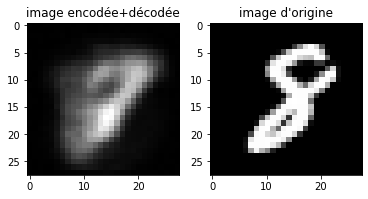

----------------------------------------
EPOCH 2
Mean loss :  173.245725859375


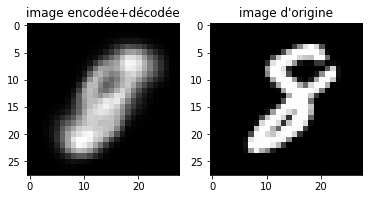

----------------------------------------
EPOCH 3
Mean loss :  167.8219431640625


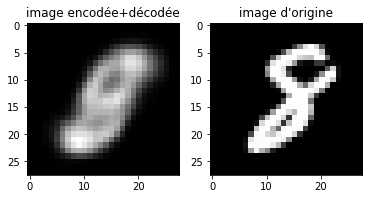

----------------------------------------
EPOCH 4
Mean loss :  165.57570943359374


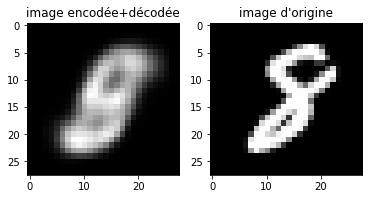

----------------------------------------
EPOCH 5
Mean loss :  164.27409240234374


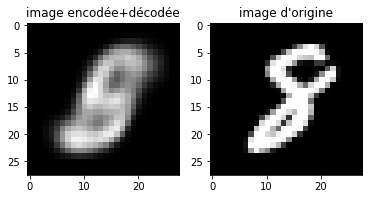

----------------------------------------
EPOCH 6
Mean loss :  163.334674375


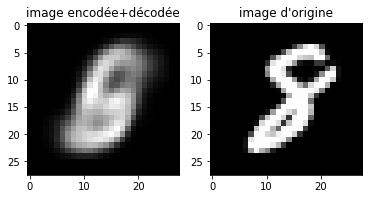

----------------------------------------
EPOCH 7
Mean loss :  162.5733970703125


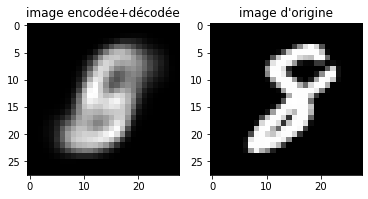

----------------------------------------
EPOCH 8
Mean loss :  161.9486819140625


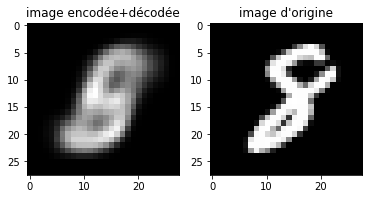

----------------------------------------
EPOCH 9
Mean loss :  161.42498939453125


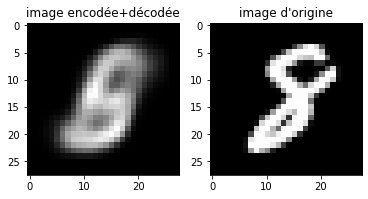

----------------------------------------
EPOCH 10
Mean loss :  160.9205328125


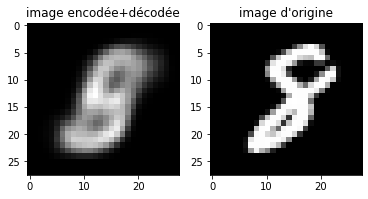

----------------------------------------
EPOCH 11
Mean loss :  160.454642109375


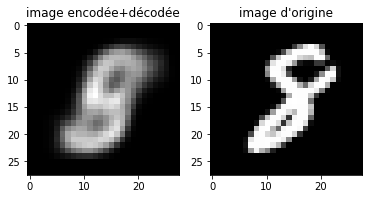

----------------------------------------
EPOCH 12
Mean loss :  160.0613747265625


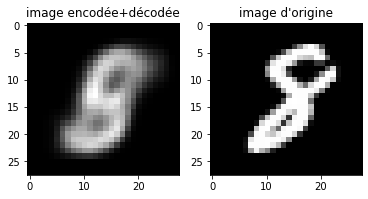

----------------------------------------
EPOCH 13
Mean loss :  159.68182009765624


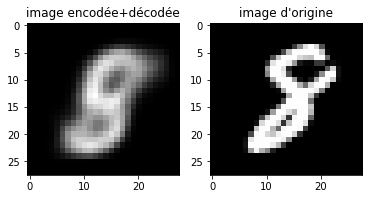

----------------------------------------
EPOCH 14
Mean loss :  159.3372253125


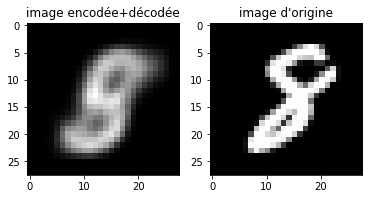

----------------------------------------
EPOCH 15
Mean loss :  159.02238265625


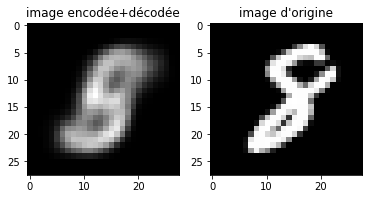

----------------------------------------
EPOCH 16
Mean loss :  158.7344630078125


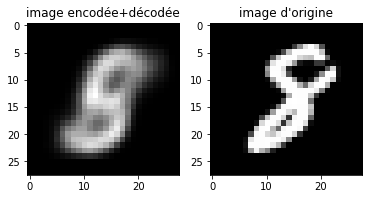

----------------------------------------
EPOCH 17
Mean loss :  158.43885708984374


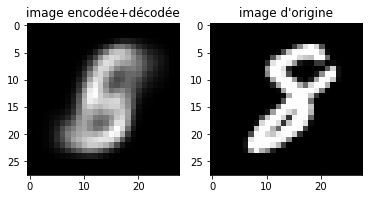

----------------------------------------
EPOCH 18
Mean loss :  158.14715580078126


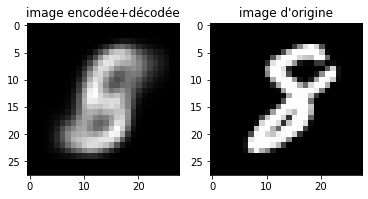

----------------------------------------
EPOCH 19
Mean loss :  157.896538359375


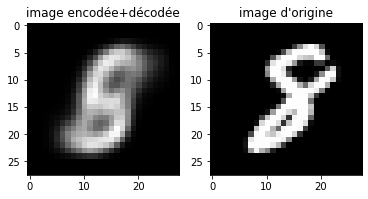

----------------------------------------
EPOCH 20
Mean loss :  157.6945674609375


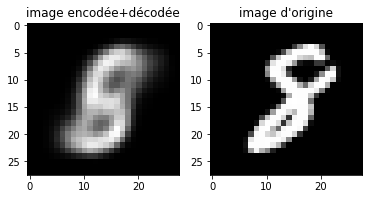

----------------------------------------
EPOCH 21
Mean loss :  157.454301796875


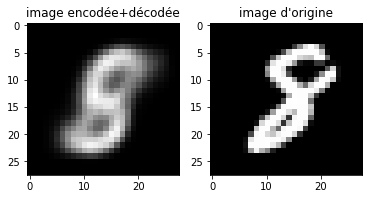

----------------------------------------
EPOCH 22
Mean loss :  157.2426848046875


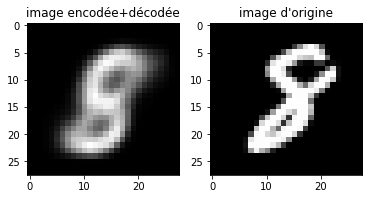

----------------------------------------
EPOCH 23
Mean loss :  157.0127294140625


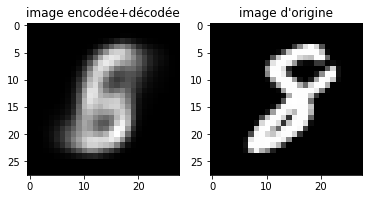

----------------------------------------
EPOCH 24
Mean loss :  156.81762921875


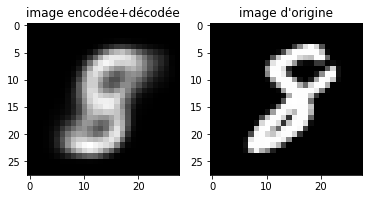

----------------------------------------
EPOCH 25
Mean loss :  156.66277302734375


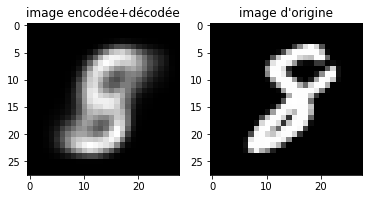

----------------------------------------
EPOCH 26
Mean loss :  156.50275369140624


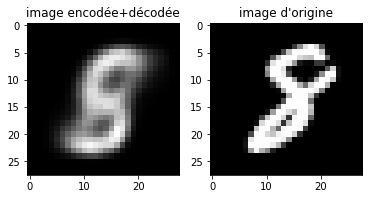

----------------------------------------
EPOCH 27
Mean loss :  156.32901158203126


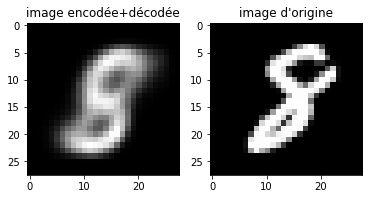

----------------------------------------
EPOCH 28
Mean loss :  156.2015040234375


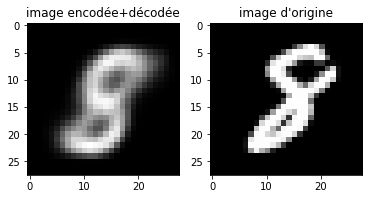

----------------------------------------
EPOCH 29
Mean loss :  156.04739451171875


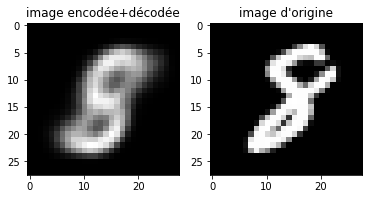

----------------------------------------
EPOCH 30
Mean loss :  155.8617484375


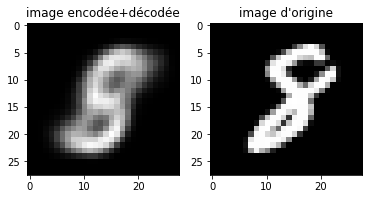

----------------------------------------
EPOCH 31
Mean loss :  155.74967751953125


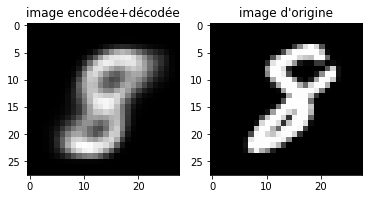

----------------------------------------
EPOCH 32
Mean loss :  155.664889296875


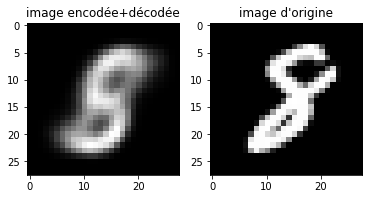

----------------------------------------
EPOCH 33
Mean loss :  155.5445940234375


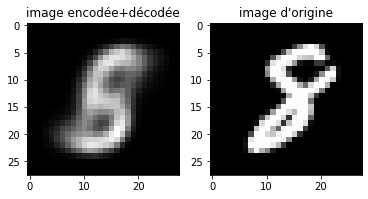

----------------------------------------
EPOCH 34
Mean loss :  155.40502294921876


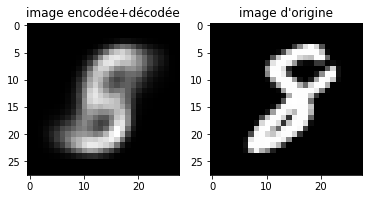

----------------------------------------
EPOCH 35
Mean loss :  155.3137360546875


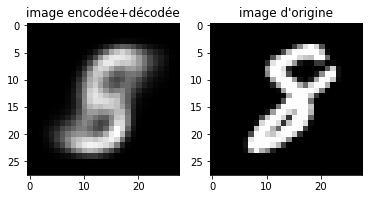

----------------------------------------
EPOCH 36
Mean loss :  155.189462109375


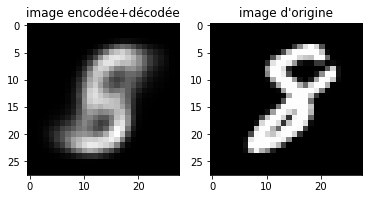

----------------------------------------
EPOCH 37
Mean loss :  155.06892705078124


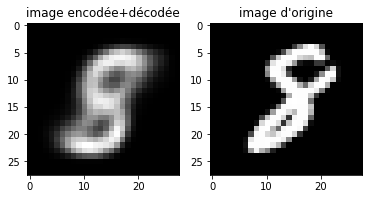

----------------------------------------
EPOCH 38
Mean loss :  155.0301319921875


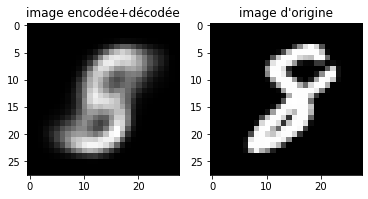

----------------------------------------
EPOCH 39
Mean loss :  154.85098115234376


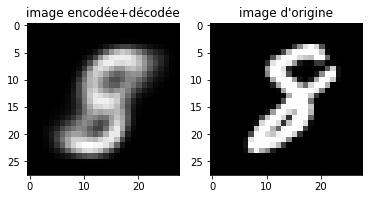

----------------------------------------
EPOCH 40
Mean loss :  154.8667086328125


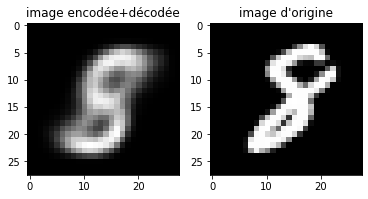

----------------------------------------
EPOCH 41
Mean loss :  154.7064669921875


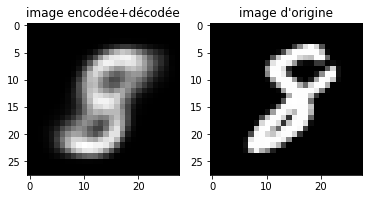

----------------------------------------
EPOCH 42
Mean loss :  154.64992138671874


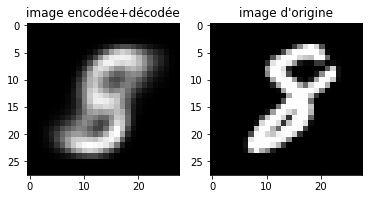

----------------------------------------
EPOCH 43
Mean loss :  154.58447041015626


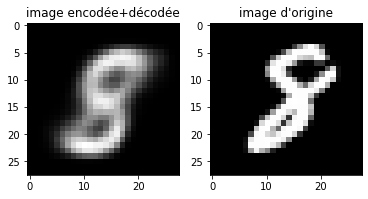

----------------------------------------
EPOCH 44
Mean loss :  154.52511259765626


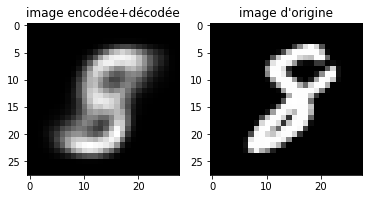

----------------------------------------
EPOCH 45
Mean loss :  154.42485056640626


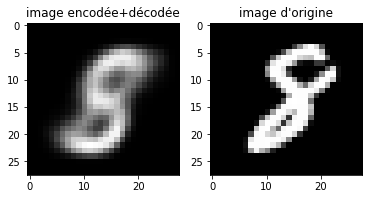

----------------------------------------
EPOCH 46
Mean loss :  154.34724193359375


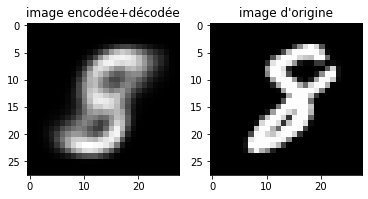

----------------------------------------
EPOCH 47
Mean loss :  154.3352111328125


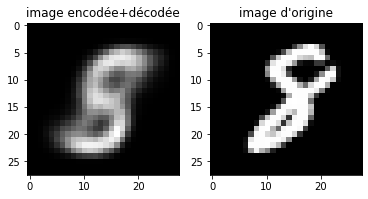

----------------------------------------
EPOCH 48
Mean loss :  154.2069141796875


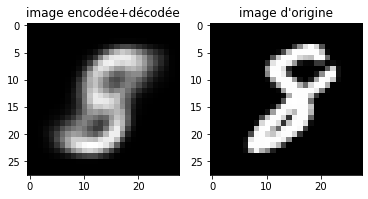

----------------------------------------
EPOCH 49
Mean loss :  154.18071158203125


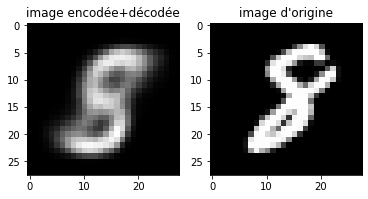

----------------------------------------
EPOCH 50
Mean loss :  154.13447279296875


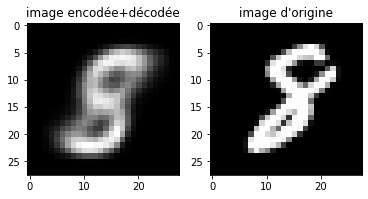

----------------------------------------


In [120]:
train(encoder, decoder,128, max_epochs=50)

## 1.5. Generate new images
Note: they will be blurry, but that's ok!

tensor([[ 0.6977, -1.2620],
        [-0.7531,  0.4562],
        [ 0.7259,  0.1621],
        [ 0.9827, -0.4349],
        [ 0.2060,  0.4032],
        [ 0.2776, -0.1442],
        [-0.1294, -3.1868],
        [ 2.5456, -0.5521],
        [-0.5345, -0.4843],
        [ 0.5877,  1.4475]])


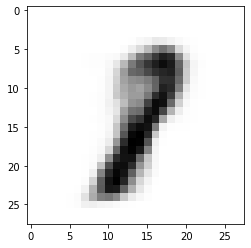

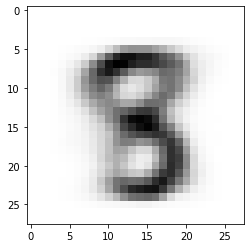

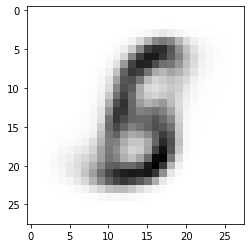

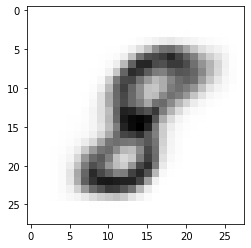

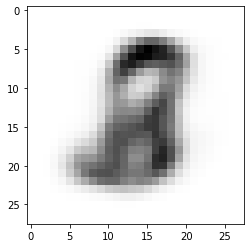

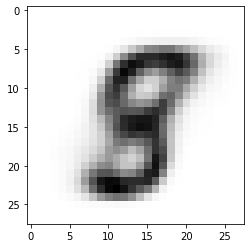

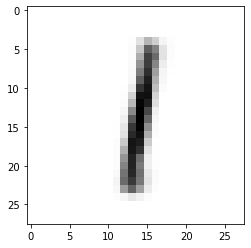

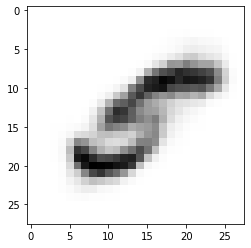

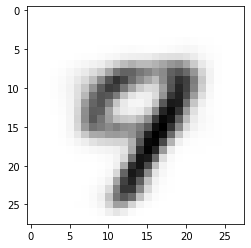

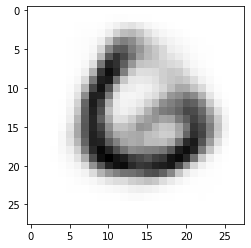

In [121]:
# e = th.normal(0., 1., (10, 2))
e = th.empty((10,2)).normal_(mean=0,std=1)
print(e)
images = th.sigmoid(decoder(e))

for i in range(10):
    picture = images[i].clone().detach().numpy()
    plt.imshow(picture.reshape(28,28), cmap='Greys')
    plt.show()